In [2]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("/home/postdoc/dsen/Desktop/codes/G-ZZ_clean/jl_files/zz_samplers.jl")
include("temp.jl")

run_sampler (generic function with 4 methods)

In [5]:
X, y = load("shrinkage_data_2.6.jld", "X", "y")
d, Nobs = size(X)
σ02 = 1
my_pr = SS_prior(d, σ02)
my_ll = ll_logistic_sp(X,y)
my_model = model(my_ll, my_pr)
print("d = ",  d, ", N = ", Nobs)

d = 101, N = 600

### GZZ:

In [6]:
# Sub-sampling without control variates and with weights:
mb_size = 1
max_attempts = 10^7
lambda = 2e1
Print = true;

In [7]:
start = time()
run_sampler(my_model, lambda, max_attempts, mb_size, Print) 
print("Sampling in ", round((time()-start)/60,1), " mins \n")

10 percent attempts in 59.29 min; zz bounces = 207528, hyp bounces = 4158, total time of process = 206.945 
20 percent attempts in 124.69 min; zz bounces = 413619, hyp bounces = 8295, total time of process = 413.332 
30 percent attempts in 192.19 min; zz bounces = 621726, hyp bounces = 12470, total time of process = 619.980 
40 percent attempts in 259.66 min; zz bounces = 830395, hyp bounces = 16656, total time of process = 827.039 
50 percent attempts in 324.69 min; zz bounces = 1036094, hyp bounces = 20689, total time of process = 1033.782 
60 percent attempts in 387.96 min; zz bounces = 1243645, hyp bounces = 24921, total time of process = 1240.510 
70 percent attempts in 463.23 min; zz bounces = 1450410, hyp bounces = 29060, total time of process = 1447.215 
80 percent attempts in 703.35 min; zz bounces = 1657104, hyp bounces = 33131, total time of process = 1653.998 
90 percent attempts in 767.31 min; zz bounces = 1867035, hyp bounces = 37293, total time of process = 1860.346 
100

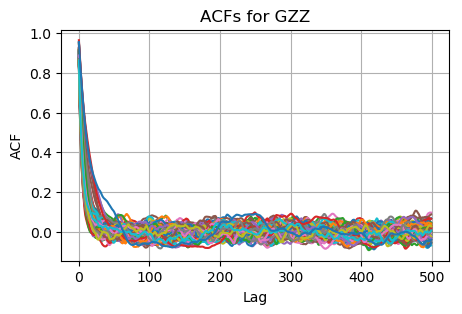

In [8]:
fig = figure("pyplot_barplot",figsize=(5,3))
n_samples = 10^4
maxlag_gzz = 500
acfs_gzz = zeros(d,maxlag_gzz)
discard = 0
filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/lambda:"*string(lambda)*
            "-d:"*string(d)*"-Nobs:"*string(Nobs)*"-mb_size:"*string(mb_size)*".jld"
xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
xi_samples_gzz = extract_samples(xt_skel[:,discard+1:end], 
                             bt_skel[:,discard+1:end], 
                            (bt_skel[end]-bt_skel[discard+1])/n_samples,
                            "linear")[:,1:end-1]
iacts_gzz = zeros(size(xi_samples_gzz,1))
for dim in 1:size(xi_samples_gzz,1)
    a = acf(xi_samples_gzz[dim,:],maxlag_gzz)
    plot(a)
    acfs_gzz[dim,:] = a
end
title("ACFs for GZZ")
xlabel("Lag")
ylabel("ACF")
grid(true)
xt_skel, bt_skel, xi_samples = [], [], []
gc()